In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from imblearn.over_sampling import ADASYN
from sklearn.cross_validation import *
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
import xgboost as xgb
from vecstack import stacking
from catboost import Pool, CatBoostClassifier
from collections import Counter,OrderedDict
import lightgbm as lgb
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA,FastICA
from sklearn.linear_model import LogisticRegression
%matplotlib inline

/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
train_data=pd.read_csv('/home/ashwin/Downloads/hackerearth/train.csv')
test_data=pd.read_csv('/home/ashwin/Downloads/hackerearth/test.csv')


In [3]:
print(train_data.shape)
print(test_data.shape)

(169307, 43)
(91166, 42)


In [4]:
target=train_data['target']
train_data=train_data.drop('target',axis=1)
train_data=train_data.drop('connection_id',axis=1)
test_data=test_data.drop('connection_id',axis=1)

In [5]:
combain_data=pd.concat([train_data,test_data],axis=0)
print(combain_data.shape)

(260473, 41)


In [6]:

target.value_counts()

0    98868
2    36854
1    33585
Name: target, dtype: int64

In [7]:
combain_data[['cont_1','cont_2','cont_3']]=combain_data[['cont_1','cont_2','cont_3']].astype(np.float64)
combain_data.dtypes

cont_1     float64
cont_2     float64
cont_3     float64
cont_4     float64
cont_5     float64
cont_6     float64
cont_7     float64
cont_8     float64
cont_9     float64
cont_10    float64
cont_11    float64
cont_12    float64
cont_13    float64
cont_14    float64
cont_15    float64
cont_16    float64
cont_17    float64
cont_18    float64
cat_1        int64
cat_2        int64
cat_3        int64
cat_4        int64
cat_5        int64
cat_6        int64
cat_7        int64
cat_8        int64
cat_9        int64
cat_10       int64
cat_11       int64
cat_12       int64
cat_13       int64
cat_14       int64
cat_15       int64
cat_16       int64
cat_17       int64
cat_18       int64
cat_19       int64
cat_20       int64
cat_21       int64
cat_22       int64
cat_23       int64
dtype: object

In [8]:
numerical_var=[f for f in combain_data.columns if combain_data.dtypes[f] 
        != 'int64']
catagorical_var=[f for f in combain_data.columns 
                 if(combain_data.dtypes[f] == 'int64' or 
                    combain_data.dtypes[f] == 'str')]
print(numerical_var)
print(catagorical_var)

['cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5', 'cont_6', 'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18']
['cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8', 'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15', 'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_20', 'cat_21', 'cat_22', 'cat_23']


In [ ]:

list(combain_data)
for x in not_dummified:
    print(x)
    print(stats.skew(combain_data[x]))
    print(stats.kurtosis(combain_data[x]))
    print('-----------------')

In [9]:
scaler = StandardScaler()
i=0
while(i<=15):
    for c in numerical_var:
            if(stats.skew(combain_data[c])>0 and stats.skew(combain_data[c])>1.5):
                combain_data[c]=np.log1p(combain_data[c])
            elif(stats.skew(combain_data[c])<0 and stats.skew(combain_data[c])<-1.5):
                combain_data[c] = combain_data[c]**6
                combain_data[c] = scaler.fit_transform(combain_data[[c]])
    i=i+1

In [10]:

print(len(set(combain_data['cat_2'])))
print(len(set(combain_data['cat_20'])))
print(len(set(combain_data['cat_21'])))
print(len(set(combain_data['cat_22'])))
print(len(set(combain_data['cat_23'])))

66
462
431
256
256


In [23]:
z = combain_data['cat_2']
z=Counter(z)
print(len(z))
for i in OrderedDict(z.most_common()):
    print(i,z[i])

KeyError: 'cat_2'

In [10]:
cat_2=[]
for i in combain_data['cat_2']:
    if(i==10):
        cat_2.append(1)
    elif(i==13):
        cat_2.append(2)
    elif(i==1):
        cat_2.append(3)
    elif(i==2 | i==11 | i==15 | i==3 | i==7):
        cat_2.append(4)
    else:
        cat_2.append(5)
cat_20=[]
for i in combain_data['cat_20']:
    if(i==511):
        cat_20.append(1)
    elif(i==1):
        cat_20.append(2)
    elif(i==510):
        cat_20.append(3)
    elif(i==2 | i==509 | i==4 | i==3 | i==5 | i==6 | i==7):
        cat_20.append(4)
    elif(i==8 | i==9 | i==10 | i==11 | i==12 | i==13):
        cat_20.append(5)
    else:
        cat_20.append(6)
cat_21=[]
for i in combain_data['cat_21']:
    if(i==511):
        cat_21.append(1)
    elif(i==1):
        cat_21.append(2)
    elif(i==510 |i==2 |i==3):
        cat_21.append(3)
    elif(i==4 | i==5 | i==6 | i==7):
        cat_21.append(4)
    elif(i==8 | i==9 | i==10 | i==11 | i==12 | i==13):
        cat_21.append(5)
    elif(i==14 | i==15 | i==16 | i==17 | i==18 | i==19 | i==20):
        cat_21.append(6)
    else:
        cat_21.append(7)
cat_22=[]
for i in combain_data['cat_22']:
    if(i==255):
        cat_22.append(1)
    elif(i==1 |i==2 |i==3 |i==4 | i==5 |i==6 |i==7 |i==8 |i==9):
        cat_22.append(2)
    else:
        cat_22.append(3)
cat_23=[]
for i in combain_data['cat_23']:
    if(i==255):
        cat_23.append(1)
    elif(i==1 |i==2 |i==3 |i==4 | i==5 | i==6 | i==7 |i==8 | i==9 
        | i==10 | i==11 | i==12 | i==13 | i==14 | i==15 | i==16 
        | i==17 | i==18 | i==19 | i==20):
        cat_23.append(2)
    else:
        cat_23.append(3)

In [11]:
combain_data['cat_2']=cat_2
combain_data['cat_20']=cat_20
combain_data['cat_21']=cat_21
combain_data['cat_22']=cat_22
combain_data['cat_23']=cat_23
del cat_2,cat_20,cat_21,cat_22,cat_23

In [13]:
temp=combain_data[numerical_var]
combain_data=combain_data[catagorical_var].astype(np.str)

In [14]:
combain_data['cat_2_cat_21'] = \
    combain_data[['cat_2', 'cat_21']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_2_cat_22'] = \
    combain_data[['cat_2', 'cat_22']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_2_cat_23'] = \
    combain_data[['cat_2', 'cat_23']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_2_cat_20'] = \
    combain_data[['cat_2', 'cat_20']].apply(lambda x: ''.join(x), axis=1)

combain_data['cat_20_cat_21'] = \
    combain_data[['cat_20', 'cat_21']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_20_cat_22'] = \
    combain_data[['cat_20', 'cat_22']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_20_cat_23'] = \
    combain_data[['cat_20', 'cat_23']].apply(lambda x: ''.join(x), axis=1)


In [ ]:

combain_data['cat_20_cat_21_cat_22'] = \
    combain_data[['cat_20', 'cat_21','cat_22']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_21_cat_22_cat_23'] = \
    combain_data[['cat_21', 'cat_22','cat_23']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_22_cat_23_cat_20'] = \
    combain_data[['cat_22', 'cat_23','cat_21']].apply(lambda x: ''.join(x), axis=1)

combain_data['cat_20_cat_21_cat_22_cat_23'] = \
    combain_data[['cat_20', 'cat_21','cat_22','cat_23']].apply(lambda x: ''.join(x), axis=1)


In [ ]:
combain_data['cat_1_cat_2'] = \
    combain_data[['cat_1', 'cat_2']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_1_cat_3'] = \
    combain_data[['cat_1', 'cat_3']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_1_cat_4'] = \
    combain_data[['cat_1', 'cat_4']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_1_cat_5'] = \
    combain_data[['cat_1', 'cat_5']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_1_cat_6'] = \
    combain_data[['cat_1', 'cat_6']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_1_cat_7'] = \
    combain_data[['cat_1', 'cat_7']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_1_cat_8'] = \
    combain_data[['cat_1', 'cat_8']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_1_cat_9'] = \
    combain_data[['cat_1', 'cat_9']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_1_cat_10'] = \
    combain_data[['cat_1', 'cat_10']].apply(lambda x: ''.join(x), axis=1)


combain_data['cat_11_cat_12'] = \
    combain_data[['cat_11', 'cat_12']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_11_cat_13'] = \
    combain_data[['cat_11', 'cat_13']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_11_cat_14'] = \
    combain_data[['cat_11', 'cat_14']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_11_cat_15'] = \
    combain_data[['cat_11', 'cat_15']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_11_cat_16'] = \
    combain_data[['cat_11', 'cat_16']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_11_cat_17'] = \
    combain_data[['cat_11', 'cat_17']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_11_cat_18'] = \
    combain_data[['cat_11', 'cat_18']].apply(lambda x: ''.join(x), axis=1)
combain_data['cat_11_cat_19'] = \
    combain_data[['cat_11', 'cat_19']].apply(lambda x: ''.join(x), axis=1)



In [15]:
combain_data=pd.concat([combain_data,temp],axis=1)
del temp
print(combain_data.shape)

(260473, 48)


In [17]:
list(combain_data)

['cont_1',
 'cont_2',
 'cont_3',
 'cont_4',
 'cont_5',
 'cont_6',
 'cont_7',
 'cont_8',
 'cont_9',
 'cont_10',
 'cont_11',
 'cont_12',
 'cont_13',
 'cont_14',
 'cont_15',
 'cont_16',
 'cont_17',
 'cont_18',
 '1',
 '2',
 '3',
 '1',
 '2',
 '3',
 '5',
 '1',
 '10',
 '11',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '0',
 '1',
 '0',
 '1',
 '3',
 '0',
 '2',
 '0',
 '1',
 '10',
 '12',
 '13',
 '14',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '24',
 '28',
 '3',
 '30',
 '4',
 '5',
 '6',
 '0',
 '1',
 '3',
 '0',
 '1',
 '0',
 '1',
 '10',
 '166',
 '2',
 '21',
 '254',
 '3',
 '31',
 '378',
 '4',
 '435',
 '6',
 '8',
 '884',
 '0',
 '1',
 '0',
 '1',
 '2',
 '0',
 '1',
 '184',
 '2',
 '289',
 '36',
 '4',
 '421',
 '480',
 '5',
 '6',
 '9',
 '993',
 '0',
 '1',
 '13',
 '14',
 '15',
 '2',
 '22',
 '25',
 '3',
 '4',
 '5',
 '0',
 '1',
 '2',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '8',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '2',
 '3',
 '6',
 '1',
 '2',
 '4',
 '7',
 '1',
 '3',
 '1',
 '3',
 '11',
 '12',
 '14',
 '17',
 '

In [16]:
catagorical_var=[f for f in combain_data.columns 
                 if(f not in numerical_var)]


In [16]:
not_dummified=[]
for c in catagorical_var:
    #if(len(set(combain_data[c]))<=20):
        temp_data=pd.get_dummies(combain_data[c])
        combain_data=combain_data.drop(c,axis=1)
        combain_data=pd.concat([combain_data,temp_data],axis=1)
    #else:
       # print(1)
       # not_dummified.append(c)

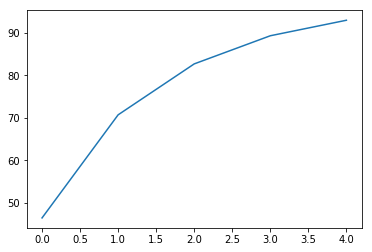

In [42]:
scaler = StandardScaler()
pca = PCA(n_components=5)
pca.fit(scaler.fit_transform(combain_data[numerical_var]))
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
plt.show()

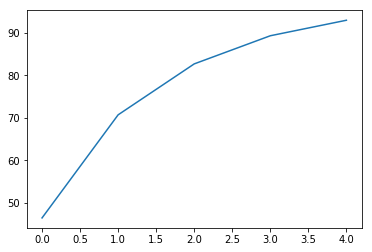

In [18]:
scaler = StandardScaler()
pca = PCA(n_components=5)
pca.fit(scaler.fit_transform(combain_data[numerical_var]))
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
plt.show()
x=pca.transform(combain_data[numerical_var])
x=x.reshape(260473, 5)
#t=pd.DataFrame(data=x,columns=['comp1', 'comp2', 'comp3','comp4','comp5','comp6','comp7','comp8','comp9' ,'comp10'])
#t=pd.DataFrame(data=x,columns=['comp1', 'comp2', 'comp3','comp4','comp5','comp6','comp7'])
t=pd.DataFrame(data=x,columns=['comp1', 'comp2', 'comp3','comp4','comp5'])
#x=pd.concat([x,combain_data[catagorical_var]],axis=1)
t.shape
t.reset_index(inplace=True, drop=True)
combain_data=combain_data.drop(numerical_var,axis=1)
y=combain_data
y.shape
y.reset_index(inplace=True, drop=True)
z=pd.concat([t,y],axis=1)

In [ ]:
scaler = StandardScaler()
i=0
while(i<=1):
    for c in not_dummified:
        if(c != 'cat_2'):
            if(stats.skew(combain_data[c])>0 and stats.skew(combain_data[c])>0.75):
                combain_data[c]=np.log1p(combain_data[c])
            elif(stats.skew(combain_data[c])<0 and stats.skew(combain_data[c])<-0.75):
                combain_data[c] = combain_data[c]**3
                combain_data[c] = scaler.fit_transform(combain_data[[c]])
        else:
            combain_data[c] = scaler.fit_transform(combain_data[[c]])
    i=i+1

In [11]:
train_data=combain_data[:169307]
train_data['target']=target
train_data_1=train_data.loc[train_data['target'].isin([0,2])]
target_1=train_data_1['target']
train_data_2=train_data.loc[train_data['target'].isin([0,1])]
target_2=train_data_2['target']
train_data_1=train_data_1.drop('target',axis=1)
train_data_2=train_data_2.drop('target',axis=1)

/home/ashwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:

sm_svm = SMOTE(random_state=100,ratio=1,n_jobs=-1)
x_synthitic_data_1,y_synthitic_data_1 = sm_svm.fit_sample(train_data_1,target_1)

x_synthitic_data_2,y_synthitic_data_2= sm_svm.fit_sample(train_data_2, target_2)
del train_data,temp_data,catagorical_var,numerical_var,not_dummified
del train_data_1,train_data_2,target_1,target_2

/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [75]:
sm_svm = ADASYN(random_state=100,ratio=1,n_jobs=-1)
x_synthitic_data_1,y_synthitic_data_1 = sm_svm.fit_sample(z[:169307],target)

/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
df=pd.DataFrame(data=x_synthitic_data_2,columns=['cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5', 'cont_6', 'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18', 'cat_2', 'cat_20', 'cat_21', 'cat_22', 'cat_23', 1, 2, 3, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 0, 1, 3, 0, 2, 0, 1, 2, 3, 4, 5, 6, 10, 12, 13, 14, 18, 19, 20, 21, 22, 24, 28, 30, 0, 1, 3, 0, 1, 0, 1, 2, 3, 4, 6, 8, 10, 21, 31, 166, 254, 378, 435, 884, 0, 1, 0, 1, 2, 0, 1, 2, 4, 5, 6, 9, 36, 184, 289, 421, 480, 993, 0, 1, 2, 3, 4, 5, 13, 14, 15, 22, 25, 0, 1, 2, 0, 1, 2, 3, 4, 5, 8, 0, 0, 1, 0, 1])
df['target']=y_synthitic_data_2
df=df.loc[df['target'].isin([1])]
df_1=pd.DataFrame(data=x_synthitic_data_1,columns=['cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5', 'cont_6', 'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18', 'cat_2', 'cat_20', 'cat_21', 'cat_22', 'cat_23', 1, 2, 3, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 0, 1, 3, 0, 2, 0, 1, 2, 3, 4, 5, 6, 10, 12, 13, 14, 18, 19, 20, 21, 22, 24, 28, 30, 0, 1, 3, 0, 1, 0, 1, 2, 3, 4, 6, 8, 10, 21, 31, 166, 254, 378, 435, 884, 0, 1, 0, 1, 2, 0, 1, 2, 4, 5, 6, 9, 36, 184, 289, 421, 480, 993, 0, 1, 2, 3, 4, 5, 13, 14, 15, 22, 25, 0, 1, 2, 0, 1, 2, 3, 4, 5, 8, 0, 0, 1, 0, 1])
df_1['target']=y_synthitic_data_1
synthitic_data=pd.concat([df_1,df],axis=0,ignore_index=True)
y_target=synthitic_data['target']
synthitic_data=synthitic_data.drop('target',axis=1)
del df,df_1,x_synthitic_data_1,x_synthitic_data_2,y_synthitic_data_1,y_synthitic_data_2

In [ ]:
test=pd.read_csv('/home/ashwin/Downloads/hackerearth/test.csv')
n_estimators=50
model=BaggingClassifier(SVC(C=250,kernel='rbf',gamma=0.1,
     probability=True)
    , max_samples=1.0 / n_estimators, n_estimators=n_estimators,n_jobs=-1)
model.fit(synthitic_data,y_target)
predictions=model.predict(combain_data[:169307])
print('accuracy',metrics.accuracy_score(target,predictions))
predictions1=model.predict(combain_data[169307:])
submission=pd.DataFrame()
submission['connection_id']=test['connection_id']
submission['target']=predictions1
submission.to_csv('/home/ashwin/Downloads/hackerearth/submissionsvm.csv'
                  ,index=False)
del test



In [ ]:

test=pd.read_csv('/home/ashwin/Downloads/hackerearth/test.csv')
logistic_model=LogisticRegression()
#grid_values = {'penalty': ['l1'], 'C': [0.001,0.005,0.01],
#               'solver' : ['liblinear','saga'],
#               'max_iter':[10000]}
#logistic_model = GridSearchCV(model, param_grid=grid_values,
#                cv=StratifiedKFold(target, n_folds=2, shuffle=True),
#                n_jobs=-1,scoring='accuracy',refit=True)
logistic_model.fit(synthitic_data,y_target)
#print(logistic_model.best_params_,logistic_model.best_score_)
predictions=logistic_model.predict(combain_data[:169307])
print('Logistic Regression Classifier Train/valadiation result')
print('accuracy',metrics.accuracy_score(target,predictions))
predictions1=logistic_model.predict(combain_data[169307:])
submission=pd.DataFrame()
submission['connection_id']=test['connection_id']
submission['target']=predictions1
submission.to_csv('/home/ashwin/Downloads/hackerearth/submissionlogistic.csv'
                  ,index=False)
del test

In [21]:
test=pd.read_csv('/home/ashwin/Downloads/hackerearth/test.csv')
model_decision = DecisionTreeClassifier(max_depth=250, min_samples_split=5, max_features='sqrt')
model_decision.fit(z[:169307], target)
#predictions=model_decision.predict(combain_data[169307:])
#print('decision tree Classifier Train/valadiation result')
#print('accuracy',metrics.accuracy_score(target,predictions))
#pd.crosstab(target, predictions, rownames=['True'], 
#            colnames=['Predicted'], margins=True)
predictions1=model_decision.predict(z[169307:])
submission=pd.DataFrame()
submission['connection_id']=test['connection_id']
submission['target']=predictions1
submission.to_csv('/home/ashwin/Downloads/hackerearth/submissiondecision.csv'
                  ,index=False)
del test

In [ ]:
pca = FastICA(n_components=5)
pca.fit(combain_data[numerical_var])
x=pca.transform(combain_data[numerical_var])
x=x.reshape(260473, 5)
t=pd.DataFrame(data=x,columns=['comp1', 'comp2', 'comp3','comp4','comp5'])
#x=pd.concat([x,combain_data[catagorical_var]],axis=1)
t.shape
t.reset_index(inplace=True, drop=True)
y=combain_data[catagorical_var]
y.shape
y.reset_index(inplace=True, drop=True)
z=pd.concat([t,y],axis=1)

In [19]:
z['comp1_comp2']=z.comp1*z.comp2
z['comp1_comp3']=z.comp1*z.comp3
z['comp1_comp4']=z.comp1*z.comp4
z['comp1_comp5']=z.comp1*z.comp5

z['comp2_comp3']=z.comp2*z.comp3
z['comp2_comp4']=z.comp2*z.comp4
z['comp2_comp5']=z.comp2*z.comp5

z['comp3_comp4']=z.comp3*z.comp4
z['comp3_comp5']=z.comp3*z.comp5

z['comp4_comp5']=z.comp4*z.comp5

In [37]:
#z=z.drop(['cat_2','cat_20','cat_21','cat_22','cat_23'],axis=1)

In [20]:
test=pd.read_csv('/home/ashwin/Downloads/hackerearth/test.csv')
naive_byase = BernoulliNB(alpha=0.5)
naive_byase.fit(z[:169307].as_matrix(),target)
#predictions=naive_byase.predict(z[:169307])
#print('accuracy',metrics.accuracy_score(target,predictions))
predictions1=naive_byase.predict(z[169307:].as_matrix())
submission=pd.DataFrame()
submission['connection_id']=test['connection_id']
submission['target']=predictions1
submission.to_csv('/home/ashwin/Downloads/hackerearth/submissionnivebyase.csv'
                  ,index=False)
del test

In [19]:
test=pd.read_csv('/home/ashwin/Downloads/hackerearth/test.csv')
model=RandomForestClassifier(n_jobs=-1)
param_dist = {"max_depth": [1000],
              "max_features": ["auto"],
              "min_samples_split": [6,7,8],
              "min_samples_leaf": [1,3,5,8,10,15,25],
              "bootstrap": [True],
              "criterion": ["gini", "entropy"],
              #"n_estimators":[1000],
              #"n_jobs":[-1],
              "oob_score":[True,False],
              "random_state":[True,False],
              'class_weight':[{0:0.01,1:0.99,2:0.0}]
              }
#'class_weight':[{0:0.4,1:0.3,2:0.3}]
RF_model = GridSearchCV(model, param_grid=param_dist,
                n_jobs=-1,scoring='accuracy',refit=True)
RF_model.fit(z[:169307],target)
#predictions=RF_model.predict(combain_data[:169307])
#print('accuracy',metrics.accuracy_score(target,predictions))
predictions1=RF_model.predict(z[169307:])
submission=pd.DataFrame()
submission['connection_id']=test['connection_id']
submission['target']=predictions1
submission.to_csv('/home/ashwin/Downloads/hackerearth/submissionRF.csv'
                  ,index=False)
del test


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [21]:
test=pd.read_csv('/home/ashwin/Downloads/hackerearth/test.csv')
d_train = lgb.Dataset(z[:169307], label=target)
#d_valid = lgb.Dataset(combain_data[:169307], label=target)
params = {}
params['max_bin'] = 1000
params['learning_rate'] = 0.00001
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['metric'] = 'multi_logloss'          
params['sub_feature'] = 0.5      
params['bagging_fraction'] = 0.5 
params['bagging_freq'] = 250
params['num_leaves'] = 5000        
params['min_data'] = 5         
params['min_hessian'] = 0.0001
params['num_threads']=4
params['num_class']=3
clf = lgb.train(params, d_train, 1000)
#predictions=clf.predict(combain_data[:169307])
#a=[]
#for x in predictions:
#    a.append(np.argmax(x))
#print('accuracy',metrics.accuracy_score(target,a))
predictions1 = clf.predict(z[169307:])
b=[]
for x in predictions1:
    b.append(np.argmax(x))
submission=pd.DataFrame()
submission['connection_id']=test['connection_id']
submission['target']=b
submission.to_csv('/home/ashwin/Downloads/hackerearth/submissionlgbm.csv'
                  ,index=False)

In [27]:
clf.feature_importance()

array([ 735593, 1092529, 1333911,  845644,  983038,    7507,    2090,
          4502,    2180,   45544,    4677,   19555,    4842,       5,
            22,     198,       0,    9132,    5300,    2774,    4038,
             0,     722,       0,       0,    1016,     120,     680,
             0,       0,    3969,    1324,    1724,       0,     483,
           554,     492,       0,       0,       0,     116,       0,
           272,       0,       0,     327,       0,     966,       0,
          1149,     859,       0,    1520,    1000,    1086,    1061,
            18,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,     595,
           424,       0,       0,       0,    2215,     820,       9,
             0,       0,     263,     473,       0,       0,       0,
             0,       0,       0,    1948,    1068,     234,       0,
             0,       0,       0,       0,       0,       0,       0,
            34,     

In [ ]:

test=pd.read_csv('/home/ashwin/Downloads/hackerearth/test.csv')
model_cat = CatBoostClassifier(iterations=5, learning_rate=0.01, depth=16, 
        loss_function='MultiClass')
#model_cat.fit(z[:169307],target,[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
#                                19, 20, 21, 22, 23, 24, 25, 26, 27])

model_cat.fit(z[:169307],target,[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,28, 29, 30, 31,32])
#model_cat.fit(z[:169307],target,[5, 6,7,8,9])
#predictions=clf.predict(combain_data[:169307])
#print('accuracy',metrics.accuracy_score(target,predictions))
preds_class = model_cat.predict(z[169307:])
submission=pd.DataFrame()
submission['connection_id']=test['connection_id']
submission['target']=preds_class
submission.to_csv('/home/ashwin/Downloads/hackerearth/submissioncat.csv'
                  ,index=False)

In [32]:

a=[z.columns.get_loc(c) for c in z.columns]

print(z.columns.get_loc('cat_23'))


32


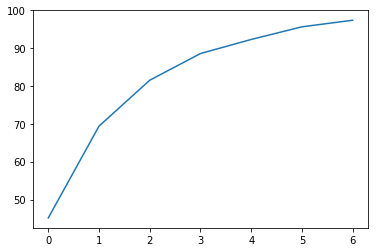

In [23]:
scaler = StandardScaler()
pca = PCA(n_components=7)
pca.fit(scaler.fit_transform(combain_data[numerical_var]))
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
plt.show()
x=pca.transform(combain_data[numerical_var])
#t=pd.DataFrame(data=x,columns=['comp1', 'comp2', 'comp3','comp4','comp5','comp6','comp7','comp8','comp9','comp10'])
t=pd.DataFrame(data=x,columns=['comp1', 'comp2', 'comp3','comp4','comp5','comp6','comp7'])
#x=pd.concat([x,combain_data[catagorical_var]],axis=1)
t.shape
t.reset_index(inplace=True, drop=True)
train_data_2=combain_data.drop(numerical_var,axis=1)
y=train_data_2
y.shape
y.reset_index(inplace=True, drop=True)
z=pd.concat([t,y],axis=1)

In [21]:
clf = SGDClassifier(n_jobs=-1,class_weight={0:0.40,1:0.30,2:0.30}
                    ,shuffle=True,n_iter=1000)
clf.partial_fit(z, target_1,classes=[0,1,2])

/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 0.4, 1: 0.3, 2: 0.3}, epsilon=0.1, eta0=0.0,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='hinge', max_iter=1000, n_iter=None, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [24]:
clf.partial_fit(z, target_2,classes=[0,1,2])

SGDClassifier(alpha=0.0001, average=False,
       class_weight={0: 0.4, 1: 0.3, 2: 0.3}, epsilon=0.1, eta0=0.0,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='hinge', max_iter=1000, n_iter=None, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [17]:
test=pd.read_csv('/home/ashwin/Downloads/hackerearth/test.csv')

clf = SGDClassifier(n_jobs=-1,class_weight={0:0.40,1:0.30,2:0.30}
                    ,shuffle=True,n_iter=100)
clf.partial_fit(z, target_1,classes=[0,1,2])
clf.partial_fit(train_data_2,target_2,classes=[0,1,2])
preds_class = clf.predict(combain_data[169307:])
submission=pd.DataFrame()
submission['connection_id']=test['connection_id']
submission['target']=preds_class
submission.to_csv('/home/ashwin/Downloads/hackerearth/submissionsgd.csv'
                  ,index=False)

/home/ashwin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [25]:
preds_class = clf.predict(combain_data[169307:])
submission=pd.DataFrame()
submission['connection_id']=test['connection_id']
submission['target']=preds_class
submission.to_csv('/home/ashwin/Downloads/hackerearth/submissionsgd.csv'
                  ,index=False)

ValueError: X has 1575 features per sample; expecting 1582

In [27]:
z=z.reindex(columns=list(z))
models = [
    ExtraTreesClassifier(random_state = 100, n_jobs = -1, 
        n_estimators = 100, max_depth = 1000,min_samples_leaf=6
                           ,bootstrap=True,criterion='gini',
                           oob_score=True,class_weight={0:0.4,1:0.3,2:0.3}
                           ),
        
    RandomForestClassifier(random_state = 100, n_jobs = -1, 
        n_estimators = 100, max_depth = 1000,min_samples_leaf=6
                           ,bootstrap=True,criterion='gini',
                           oob_score=True,class_weight={0:0.4,1:0.3,2:0.3}
                           ),
    CatBoostClassifier(iterations=5, learning_rate=0.01, depth=16, 
        loss_function='MultiClass')
    ]
    
# Compute stacking features
S_train, S_test = stacking(models, z[:169307].as_matrix(), target, 
        z[169307:].as_matrix())

test=pd.read_csv('/home/ashwin/Downloads/hackerearth/test.csv')
d_train = lgb.Dataset(S_train, label=target)
#d_valid = lgb.Dataset(combain_data[:169307], label=target)
params = {}
params['max_bin'] = 100
params['learning_rate'] = 0.00001
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['metric'] = 'multi_logloss'          
params['sub_feature'] = 0.5      
params['bagging_fraction'] = 0.5 
params['bagging_freq'] = 250
params['num_leaves'] = 5000        
params['min_data'] = 5         
params['min_hessian'] = 0.0001
params['num_threads']=4
params['num_class']=3
clf = lgb.train(params, d_train, 1000)
#predictions=clf.predict(combain_data[:169307])
#a=[]
#for x in predictions:
#    a.append(np.argmax(x))
#print('accuracy',metrics.accuracy_score(target,a))
predictions1 = clf.predict(S_test)
b=[]
for x in predictions1:
    b.append(np.argmax(x))
submission=pd.DataFrame()
submission['connection_id']=test['connection_id']
submission['target']=b
submission.to_csv('/home/ashwin/Downloads/hackerearth/submissionstacking.csv'
                  ,index=False)

ValueError: shape mismatch: value array of shape (42328,1) could not be broadcast to indexing result of shape (42328,)